In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['sample_submission_ns2btKE.csv', 'train', 'test_ApKoW4T.csv']


In [2]:
train = pd.read_csv('../input/train/train.csv')
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [3]:
from fastai import *

In [4]:
from fastai.vision import *
from fastai.basics import *

In [5]:
ls '../input/'

sample_submission_ns2btKE.csv  test_ApKoW4T.csv  train/


In [6]:
path= Path('../input/train/')

In [7]:
'../input/train/'

'../input/train/'

In [8]:
tfms=get_transforms()
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, res

In [9]:
data = (ImageList .from_csv(path, folder='images', csv_name='train.csv', cols='image')
       #.use_partial_data(sample_pct = .1, seed= 34)
       .split_by_rand_pct(valid_pct=0.1, seed=34)
       .label_from_df(cols='category')
        .add_test_folder(Path('../input/test_ApKoW4T.csv'))
       .transform(tfms, size = 224)
       .databunch(bs=64)).normalize(imagenet_stats)

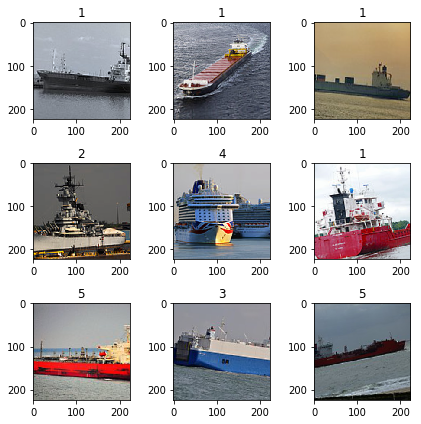

In [10]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

In [21]:
import os
model_dir="/tmp/model/"
if not os.path.exists ("/tmp/model/"):
    !mkdir "/tmp/model/"
learn = cnn_learner(data, models.densenet121,model_dir="/tmp/model/",metrics=[FBeta(beta=1),accuracy])

In [22]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.796747,0.393508,0.853391,0.846400,01:14
1,0.474959,0.278168,0.896989,0.888000,01:13
2,0.356652,0.247618,0.920048,0.910400,01:14
3,0.267996,0.211734,0.922658,0.915200,01:13
4,0.220134,0.210078,0.925444,0.918400,01:13


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [23]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

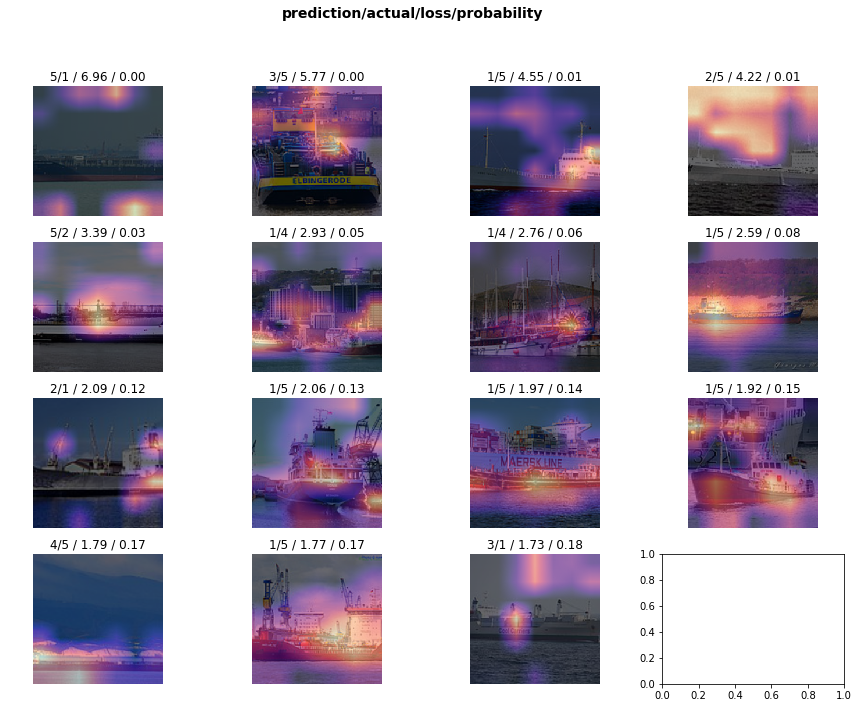

In [24]:
interp.plot_top_losses(15, figsize=(15,11))

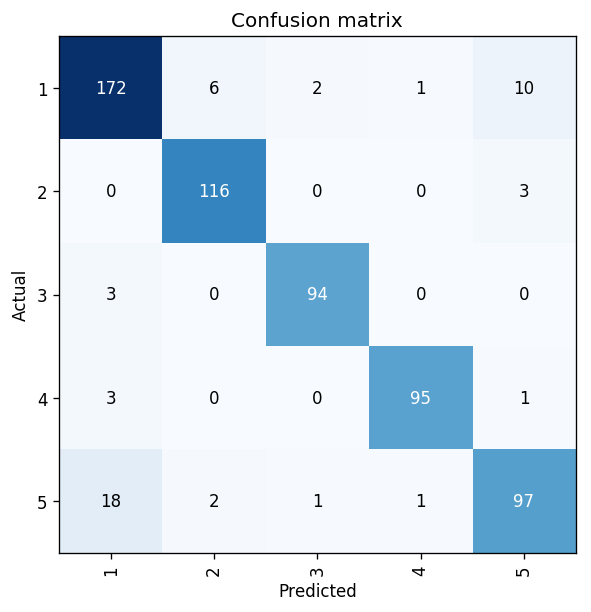

In [25]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=120)

In [26]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


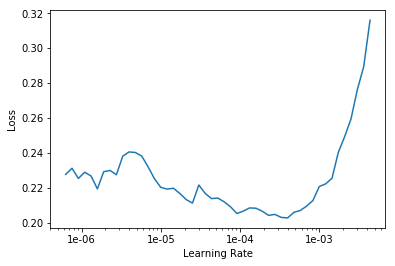

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(5, max_lr=slice(5e-4,1e-4))

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.234071,0.289741,0.896588,0.889600,01:18
1,0.241034,0.185255,0.933469,0.929600,01:18
2,0.167205,0.145790,0.948705,0.944000,01:19
3,0.104325,0.136105,0.965439,0.963200,01:19
4,0.066090,0.123720,0.962942,0.960000,01:19


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


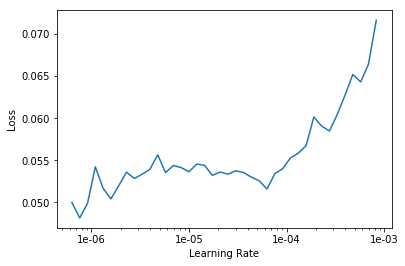

In [29]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [31]:
lr = 5e-5
lrs=np.array([lr/10,lr/3,lr])
learn.unfreeze()
learn.fit(5,lrs)

epoch,train_loss,valid_loss,f_beta,accuracy,time
0,0.053972,0.119820,0.962084,0.960000,01:18
1,0.049859,0.120913,0.962668,0.960000,01:18
2,0.041420,0.112958,0.964410,0.961600,01:15
3,0.036256,0.111618,0.965257,0.963200,01:15
4,0.036232,0.112140,0.963033,0.960000,01:15


/opt/conda/lib/python3.6/site-packages/fastai/metrics.py:179: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [38]:
train.shape

(6252, 2)

In [35]:
t  = pd.read_csv('../input/test_ApKoW4T.csv')
t.shape[0]

2680

In [43]:
path

PosixPath('../input/train')

In [47]:
cp '../input/test_ApKoW4T.csv' '../input/train/'

cp: cannot create regular file '../input/train/test_ApKoW4T.csv': Read-only file system


In [46]:
path

PosixPath('../input/train')

In [48]:
p1 = Path('../input/')

In [52]:
t['image'].tolist()

['1007700.jpg',
 '1011369.jpg',
 '1051155.jpg',
 '1062001.jpg',
 '1069397.jpg',
 '1072861.jpg',
 '1097264.jpg',
 '1098763.jpg',
 '1098766.jpg',
 '1101145.jpg',
 '1114371.jpg',
 '1114781.jpg',
 '1115492.jpg',
 '1121306.jpg',
 '1123736.jpg',
 '1124946.jpg',
 '1125700.jpg',
 '1127236.jpg',
 '1127336.jpg',
 '1130300.jpg',
 '1131990.jpg',
 '1141996.jpg',
 '1145082.jpg',
 '1153400.jpg',
 '1162763.jpg',
 '1162764.jpg',
 '1162765.jpg',
 '1163874.jpg',
 '1174623.jpg',
 '1185778.jpg',
 '1186207.jpg',
 '1193420.jpg',
 '1203926.jpg',
 '1228622.jpg',
 '1229806.jpg',
 '1243717.jpg',
 '1244690.jpg',
 '1244768.jpg',
 '1250078.jpg',
 '1250085.jpg',
 '1252407.jpg',
 '1260394.jpg',
 '1263061.jpg',
 '1263459.jpg',
 '1289223.jpg',
 '1289225.jpg',
 '1296498.jpg',
 '1311396.jpg',
 '1314965.jpg',
 '1324036.jpg',
 '1334848.jpg',
 '1334855.jpg',
 '1342277.jpg',
 '1345016.jpg',
 '1352852.jpg',
 '1359851.jpg',
 '1368439.jpg',
 '1382476.jpg',
 '1386041.jpg',
 '1396598.jpg',
 '1400085.jpg',
 '1400092.jpg',
 '141293

In [56]:
path

PosixPath('../input/train')

In [71]:
c = '../input/train/'
c1 = [path/'images'/i for i in t['image'].tolist()[:5]]
c1

[PosixPath('../input/train/images/1007700.jpg'),
 PosixPath('../input/train/images/1011369.jpg'),
 PosixPath('../input/train/images/1051155.jpg'),
 PosixPath('../input/train/images/1062001.jpg'),
 PosixPath('../input/train/images/1069397.jpg')]

In [70]:
ls '/kaggle/input/train/images/'

ls: cannot access '': No such file or directory


In [72]:
data.add_test(items=[path/'images'/i for i in t['image'].tolist()],label=None)

In [88]:
data.test_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f8c802227b8>, device=device(type='cuda'), tfms=[functools.partial(<function _normalize_batch at 0x7f8c8a5c0ea0>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f8c91797620>)

In [ ]:
learn.predict()

In [91]:
del preds

In [ ]:
preds, y = learn.TTA(DatasetType.Test)
#preds,y = learn.TTA(ds_type='Test')

In [90]:
preds

tensor([[9.9720e-01, 6.4458e-05, 1.8981e-05, 2.7932e-04, 2.4419e-03],
        [8.7746e-01, 8.6001e-04, 2.5385e-03, 1.4824e-03, 1.1765e-01],
        [1.3326e-02, 9.3279e-01, 1.3666e-04, 5.3264e-02, 4.7832e-04],
        ...,
        [2.8593e-02, 1.2355e-03, 1.9205e-03, 8.1727e-04, 9.6743e-01],
        [2.6307e-03, 1.9654e-02, 7.5662e-01, 2.1075e-01, 1.0346e-02],
        [9.8481e-01, 1.3096e-03, 4.0642e-04, 5.1974e-03, 8.2808e-03]])